## [Problem 1] Execution of various methods

In [21]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM
from keras.layers import LSTM, GRU
from tensorflow.python.keras.layers import ConvLSTM2D
from keras.datasets import imdb
from keras import backend as K
from keras.layers import Conv3D
from keras.layers import BatchNormalization
import numpy as np
import pylab as plt
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = pad_sequences(x_train, maxlen=maxlen)[:1500, :]
x_test = pad_sequences(x_test, maxlen=maxlen)[:1500, :]
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (1500, 80)
x_test shape: (1500, 80)


LSTM

In [4]:
y_train, y_test = y_train[:1500], y_test[:1500]

In [5]:
print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 228ms/step - accuracy: 0.5064 - loss: 0.6917 - val_accuracy: 0.6480 - val_loss: 0.6347
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - accuracy: 0.7543 - loss: 0.5547 - val_accuracy: 0.7467 - val_loss: 0.5250
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 226ms/step - accuracy: 0.9017 - loss: 0.2558 - val_accuracy: 0.7500 - val_loss: 0.6336
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.9654 - loss: 0.1287 - val_accuracy: 0.7620 - val_loss: 0.6027
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - accuracy: 0.9746 - loss: 0.0742 - val_accuracy: 0.7387 - val_loss: 0.9398
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.7466 - loss: 0.8871
Test score: 0.9398173689842224
Test accuracy: 0.7386666536331177


GRU

In [6]:
print('Build model GRU')
grumodel = Sequential()

grumodel.add(Embedding(max_features, 128))
grumodel.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
grumodel.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
grumodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
grumodel.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = grumodel.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('GRU Test score:', score)
print('GRU Test accuracy:', acc)

Build model GRU
Train...
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - accuracy: 0.5088 - loss: 0.6913 - val_accuracy: 0.5840 - val_loss: 0.6743
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - accuracy: 0.7319 - loss: 0.5883 - val_accuracy: 0.6380 - val_loss: 0.6181
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - accuracy: 0.8855 - loss: 2.9212 - val_accuracy: 0.6507 - val_loss: 0.6419
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - accuracy: 0.9124 - loss: 54.4361 - val_accuracy: 0.6233 - val_loss: 0.6648
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.8923 - loss: 36.3958 - val_accuracy: 0.6287 - val_loss: 0.6653
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6242 - loss: 0.6595
GRU Test score: 0.6652536392211914
GRU Test accuracy: 0.6286666393280029


In [10]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float32)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),dtype=np.float32)
    for i in range(n_samples):
        n = np.random.randint(3, 8)
        for j in range(n):
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1
            w = np.random.randint(2, 4)
            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,y_shift - w: y_shift + w, 0] += 1
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,x_shift - w - 1: x_shift + w + 1,y_shift - w - 1: y_shift + w + 1,0] += noise_f * 0.1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,y_shift - w: y_shift + w, 0] += 1
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

noisy_movies, shifted_movies = generate_movies(n_samples=1200)

/tmp/ipykernel_181368/3236107545.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


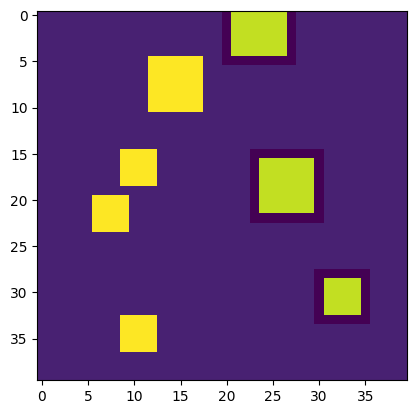

In [11]:
index = 1
x = noisy_movies[index]
fig = plt.figure()
viewer = fig.add_subplot(111)
plt.ion()
fig.show()
for i in range(len(x)):
    viewer.clear()
    viewer.imshow(x[i])
    plt.pause(.5)
    fig.canvas.draw()

ConvLSTM2D

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization

In [40]:
seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),input_shape=(None, 40, 40, 1),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),activation='sigmoid',padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

In [41]:
seq.fit(noisy_movies[:100], shifted_movies[:100], batch_size=10,epochs=1, validation_split=0.05)

2024-05-22 18:23:27.547178: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 103680000 exceeds 10% of free system memory.
2024-05-22 18:23:27.548308: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 103680000 exceeds 10% of free system memory.


 1/10 ━━━━━━━━━━━━━━━━━━━━ 3:00 20s/step - loss: 0.8331

2024-05-22 18:23:33.995956: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 103680000 exceeds 10% of free system memory.
2024-05-22 18:23:33.997665: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 103680000 exceeds 10% of free system memory.


 2/10 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - loss: 0.8332  

2024-05-22 18:23:40.923008: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 103680000 exceeds 10% of free system memory.


10/10 ━━━━━━━━━━━━━━━━━━━━ 65s 5s/step - loss: 0.8352 - val_loss: 0.6941


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


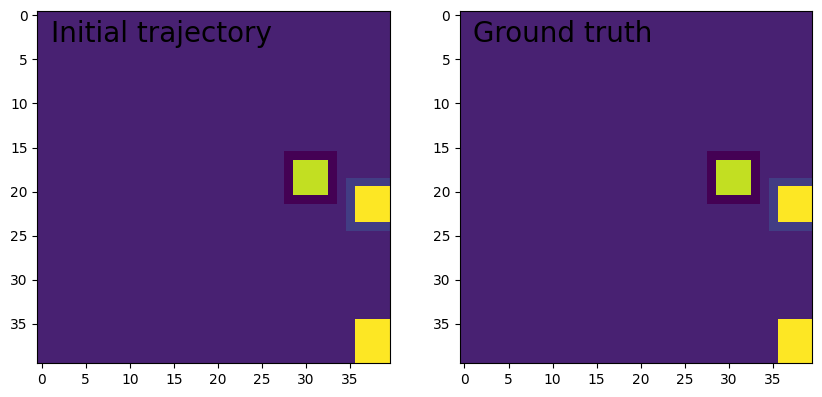

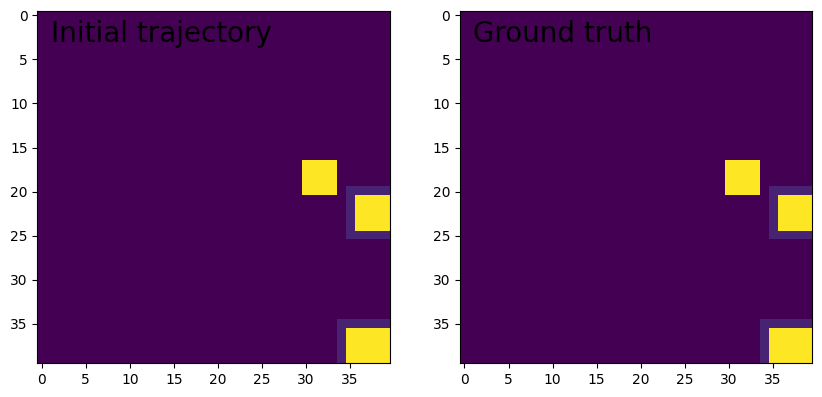

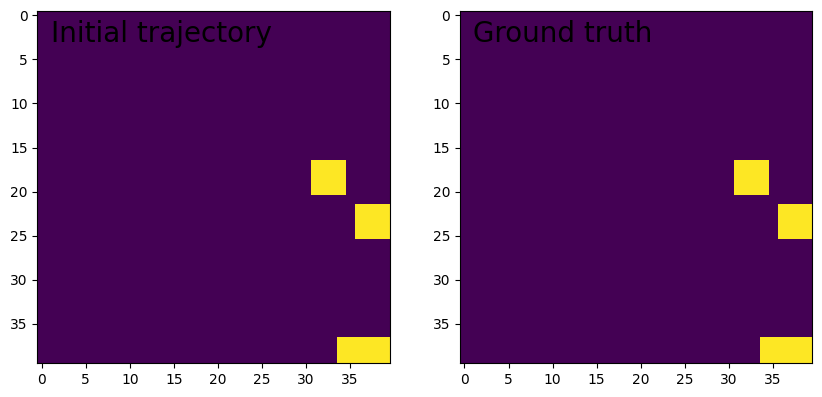

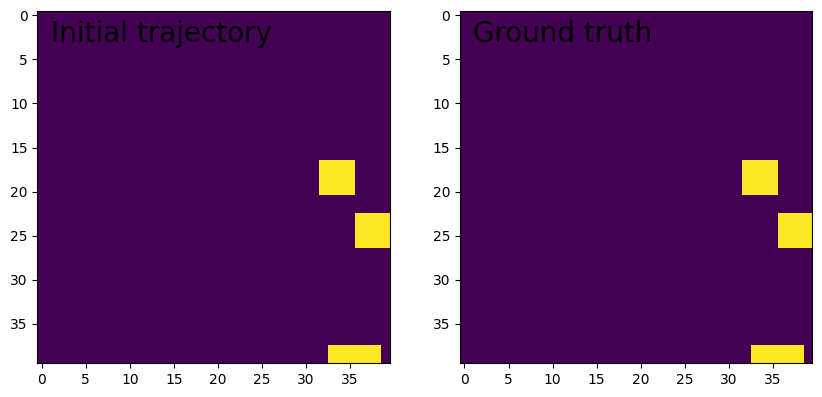

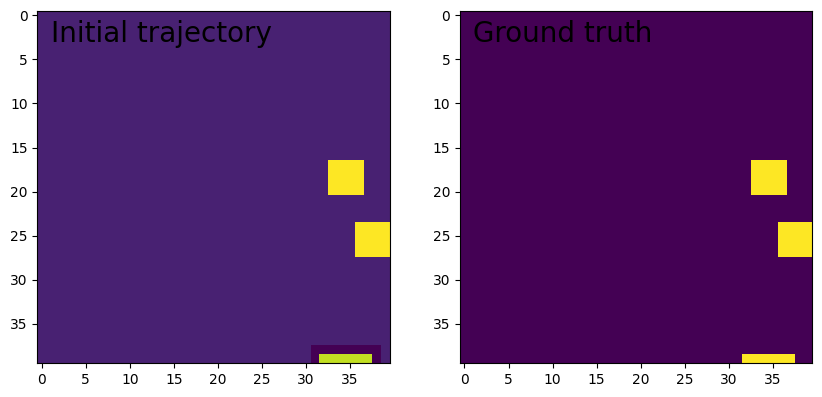

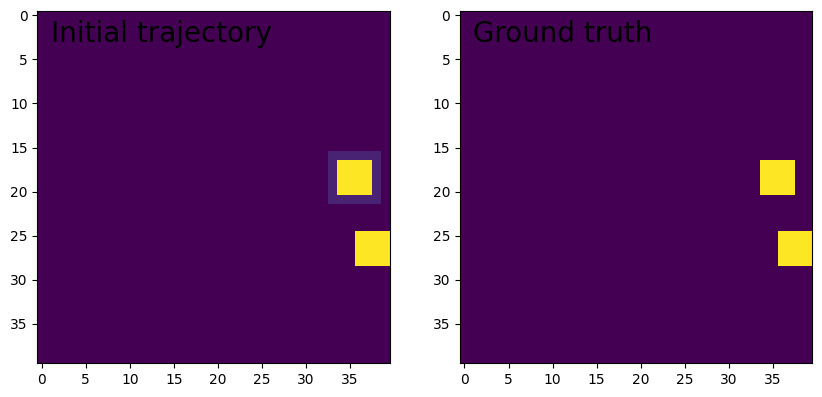

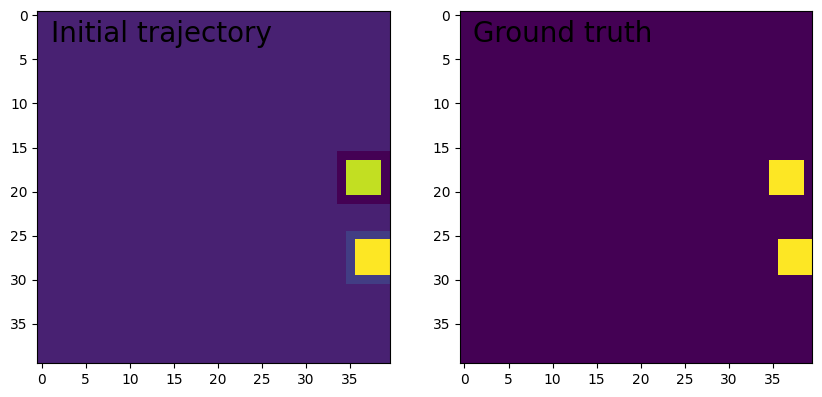

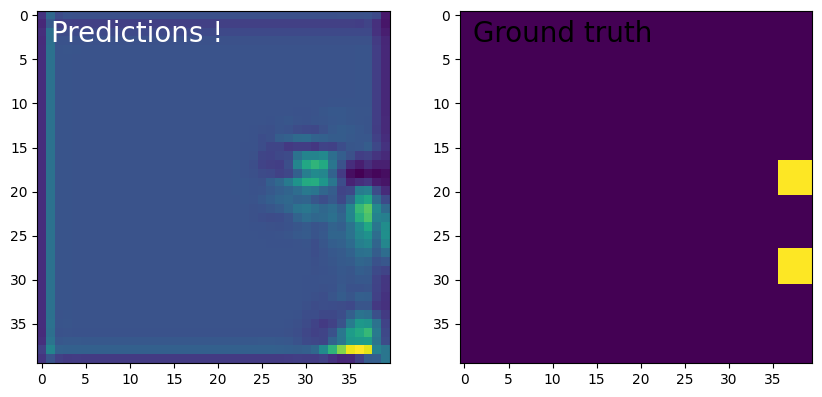

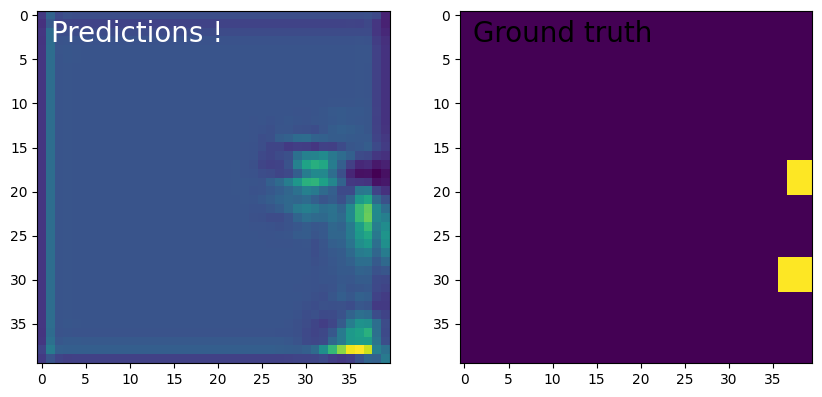

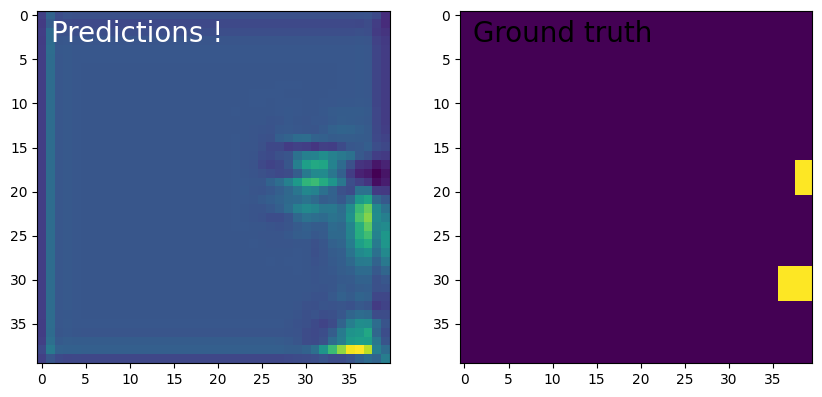

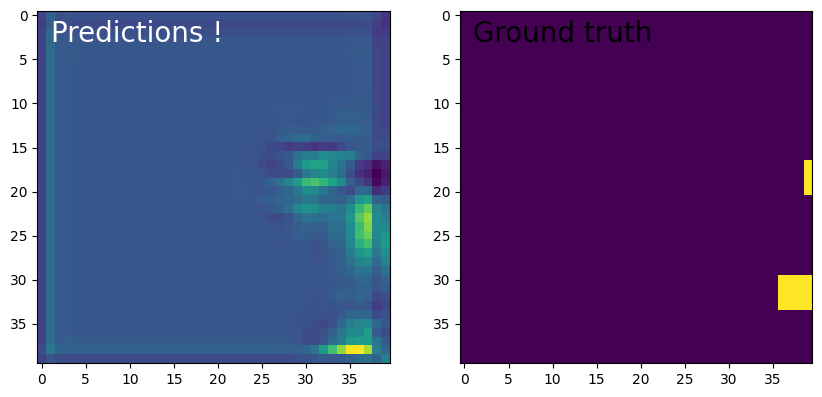

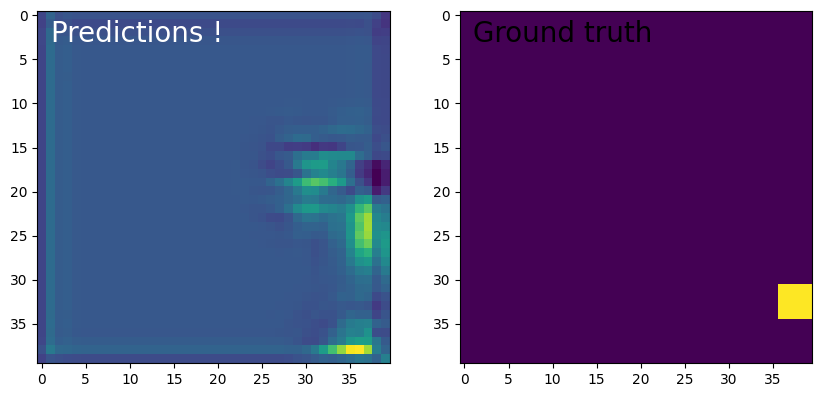

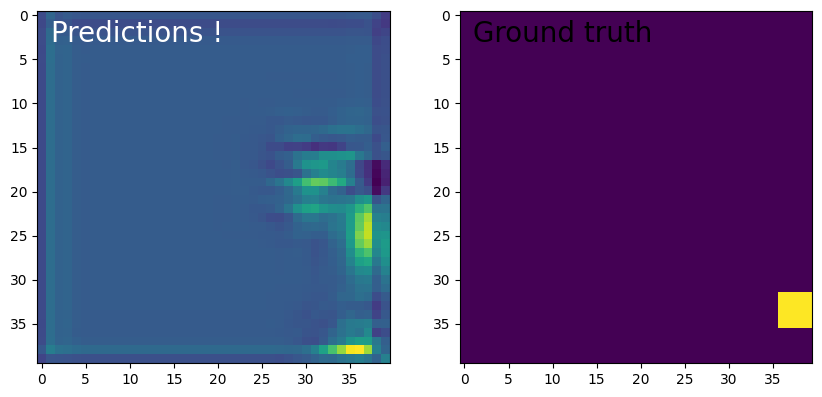

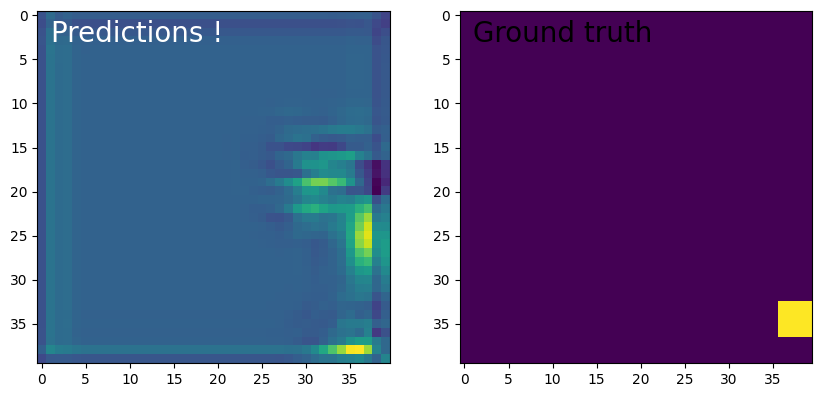

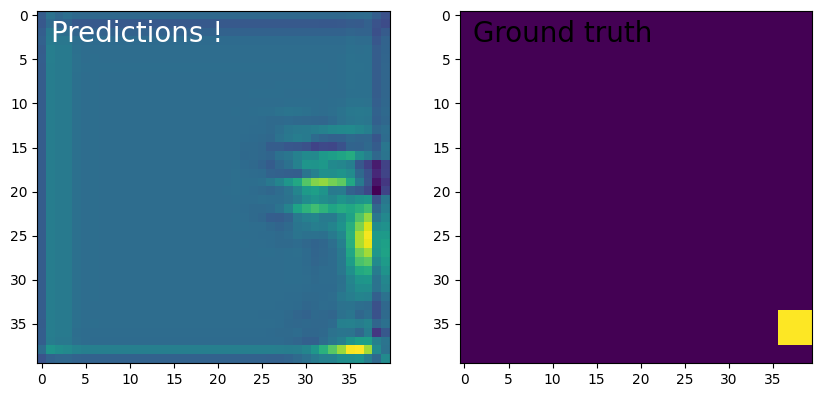

In [42]:
index = 1004
track = noisy_movies[index][:7, ::, ::, ::]
track2 = noisy_movies[index][::, ::, ::, ::]
for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)
for i in range(15):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(121)
    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)
    toplot = track[i, ::, ::, 0]
    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)
    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[index][i - 1, ::, ::, 0]
    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## [Problem 3] Explanation of other classes

- RNN - RNN cells distinguish themselves from the regular neurons in the sense that they have a state and thus can remember information from the past.
- SimpleRNNCell - SimpleRNN Cell class- A Recurrent neural network can be seen as the repetition of a single cell.
- LSTMCell - Cell class of LSTM layer - LSTM is a one kind of RNN and capable of learning long-term dependencies. LSTM cell consists of three gates including the forget gate, the input gate and the output gate.
- GRUCell - Cell class of GRU layer - It is similar to LSTM. However it does not have a cell state (Ct). It only has a hidden state(Ht). Due to the simpler architecture, GRUs are faster to train.
- StackedRNNCells - A wrapper that makes the behavior of an RNN cell stack look like a single cell. It is used to implement an efficient stacked RNN.
- CoDNNGRU - Fast GRU implementation backed by cuDNN. - Can only be run on GPU.
- CuDNNLSTM - Fast LSTM implementation backed by cuDNN - Can only be run on GPU.